<img src="https://www.worldhistory.org/uploads/images/14047.png" alt="Titanic" width="1100" height='600' /> 

# Random Forest Model for Titanic Kaggle Competition

<img src="https://cdn.dida.do/bird-(9)-1733138076.png" alt="Titanic" width="700" height='600' />

## Import Libraries and Data

In [169]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

In [170]:
# Import data
train = pd.read_csv('../data/train.csv')
test = pd.read_csv('../data/test.csv')

In [171]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Set model hyperparameters

In [172]:
model = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=0, verbose=False)

In [173]:
train['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

## Define function to convert Sex values into Binaries

In [174]:
def binary_sex(x):
    if x == 'female':
        return 1
    else:
        return 0

## Create a new column maping the function

In [175]:
train['Sex_binary'] = train['Sex'].map(binary_sex)

In [176]:
test['Sex_binary'] = train['Sex'].map(binary_sex)

In [177]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_binary
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [178]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_binary
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,1
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0


## Set variables (Gender and Age) 

In [179]:
variables = ['Sex_binary', 'Age']

In [180]:
X = train[variables]
y = train['Survived']

## Fill the NaN values with -1 values

In [181]:
X = X.fillna(-1)

In [182]:
X.head()

,Sex_binary,Age
0,0,22.0
1,1,38.0
2,1,26.0
3,1,35.0
4,0,35.0


In [183]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

----

## Fit the model to the training dataset

In [184]:
from sklearn.model_selection import RepeatedKFold

### Cross-validation

In [185]:
kf = RepeatedKFold(n_splits=2, n_repeats=10, random_state=0)

In [186]:
results = []


for lines_train, lines_valid in kf.split(X):
    print("Train:", lines_train.shape[0])
    print("Validation:", lines_valid.shape[0])
    print()

    X_train, X_valid = X.iloc[lines_train], X.iloc[lines_valid]
    y_train, y_valid = y.iloc[lines_train], y.iloc[lines_valid]

    model.fit(X_train, y_train)

    p = model.predict(X_valid)

    acc = np.mean(y_valid == p)
    results.append(acc)
    print('Acc:', acc)
    print()

Train: 445
Validation: 446

Acc: 0.7713004484304933

Train: 446
Validation: 445

Acc: 0.7797752808988764

Train: 445
Validation: 446

Acc: 0.7331838565022422

Train: 446
Validation: 445

Acc: 0.7640449438202247

Train: 445
Validation: 446

Acc: 0.7466367713004485

Train: 446
Validation: 445

Acc: 0.7617977528089888

Train: 445
Validation: 446

Acc: 0.757847533632287

Train: 446
Validation: 445

Acc: 0.7617977528089888

Train: 445
Validation: 446

Acc: 0.757847533632287

Train: 446
Validation: 445

Acc: 0.7707865168539326

Train: 445
Validation: 446

Acc: 0.7466367713004485

Train: 446
Validation: 445

Acc: 0.7617977528089888

Train: 445
Validation: 446

Acc: 0.7645739910313901

Train: 446
Validation: 445

Acc: 0.7685393258426966

Train: 445
Validation: 446

Acc: 0.7399103139013453

Train: 446
Validation: 445

Acc: 0.7707865168539326

Train: 445
Validation: 446

Acc: 0.7399103139013453

Train: 446
Validation: 445

Acc: 0.7393258426966293

Train: 445
Validation: 446

Acc: 0.7421524663677

In [187]:
results

[np.float64(0.7713004484304933),
 np.float64(0.7797752808988764),
 np.float64(0.7331838565022422),
 np.float64(0.7640449438202247),
 np.float64(0.7466367713004485),
 np.float64(0.7617977528089888),
 np.float64(0.757847533632287),
 np.float64(0.7617977528089888),
 np.float64(0.757847533632287),
 np.float64(0.7707865168539326),
 np.float64(0.7466367713004485),
 np.float64(0.7617977528089888),
 np.float64(0.7645739910313901),
 np.float64(0.7685393258426966),
 np.float64(0.7399103139013453),
 np.float64(0.7707865168539326),
 np.float64(0.7399103139013453),
 np.float64(0.7393258426966293),
 np.float64(0.742152466367713),
 np.float64(0.7730337078651686)]

In [188]:
np.mean(results)

np.float64(0.7575842696629215)

(array([1., 4., 2., 0., 0., 2., 5., 1., 4., 1.]),
 array([0.73318386, 0.737843  , 0.74250214, 0.74716128, 0.75182043,
        0.75647957, 0.76113871, 0.76579785, 0.770457  , 0.77511614,
        0.77977528]),
 <BarContainer object of 10 artists>)

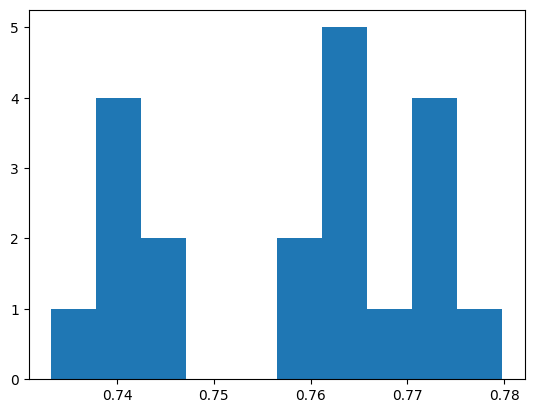

In [189]:
plt.hist(results)

----

## Adding more variables

In [190]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_binary
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [191]:
variables = ['Sex_binary', 'Age', 'Pclass', 'SibSp', 'Parch', 'Fare']

In [192]:
X = train[variables].fillna(-1)
y = train['Survived']

In [193]:
results = []


for lines_train, lines_valid in kf.split(X):
    print("Train:", lines_train.shape[0])
    print("Validation:", lines_valid.shape[0])
    print()

    X_train, X_valid = X.iloc[lines_train], X.iloc[lines_valid]
    y_train, y_valid = y.iloc[lines_train], y.iloc[lines_valid]

    model.fit(X_train, y_train)

    p = model.predict(X_valid)

    acc = np.mean(y_valid == p)
    results.append(acc)
    print('Acc:', acc)
    print()

Train: 445
Validation: 446

Acc: 0.7937219730941704

Train: 446
Validation: 445

Acc: 0.8314606741573034

Train: 445
Validation: 446

Acc: 0.8116591928251121

Train: 446
Validation: 445

Acc: 0.8157303370786517

Train: 445
Validation: 446

Acc: 0.8094170403587444

Train: 446
Validation: 445

Acc: 0.8

Train: 445
Validation: 446

Acc: 0.8094170403587444

Train: 446
Validation: 445

Acc: 0.7910112359550562

Train: 445
Validation: 446

Acc: 0.7892376681614349

Train: 446
Validation: 445

Acc: 0.8089887640449438

Train: 445
Validation: 446

Acc: 0.7892376681614349

Train: 446
Validation: 445

Acc: 0.8337078651685393

Train: 445
Validation: 446

Acc: 0.7937219730941704

Train: 446
Validation: 445

Acc: 0.7932584269662921

Train: 445
Validation: 446

Acc: 0.7869955156950673

Train: 446
Validation: 445

Acc: 0.8179775280898877

Train: 445
Validation: 446

Acc: 0.8004484304932735

Train: 446
Validation: 445

Acc: 0.7752808988764045

Train: 445
Validation: 446

Acc: 0.8116591928251121

Train: 4

## Check errors

In [194]:
X_valid_check = train.iloc[lines_valid].copy()
X_valid_check['p'] = p
X_valid_check.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_binary,p
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,1
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,0,0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,0,0


In [195]:
X_valid_check.shape

(445, 14)

In [196]:
errors = X_valid_check[X_valid_check['Survived'] != X_valid_check['p']]
errors = errors[['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 
'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Sex_binary', 'p', 'Survived']]
errors.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_binary,p,Survived
8,9,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,1,0,1
14,15,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,350406,7.8542,NaN,S,1,1,0
21,22,2,"Beesley, Mr. Lawrence",male,34.0,0,0,248698,13.0000,D56,S,0,0,1
25,26,3,"Asplund, Mrs. Carl Oscar (Selma Augusta Emilia...",female,38.0,1,5,347077,31.3875,NaN,S,1,0,1
36,37,3,"Mamee, Mr. Hanna",male,NaN,0,0,2677,7.2292,NaN,C,0,0,1


In [197]:
women = errors[errors['Sex'] == 'female']
men = errors[errors['Sex'] == 'male']

In [198]:
women.sort_values('Survived') 

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_binary,p,Survived
14,15,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,350406,7.8542,NaN,S,1,1,0
205,206,3,"Strom, Miss. Telma Matilda",female,2.0,0,1,347054,10.4625,G6,S,1,1,0
199,200,2,"Yrois, Miss. Henriette (""Mrs Harbeck"")",female,24.0,0,0,248747,13.0000,NaN,S,1,1,0
113,114,3,"Jussila, Miss. Katriina",female,20.0,1,0,4136,9.8250,NaN,S,1,1,0
297,298,1,"Allison, Miss. Helen Loraine",female,2.0,1,2,113781,151.5500,C22 C26,S,1,1,0
357,358,2,"Funk, Miss. Annie Clemmer",female,38.0,0,0,237671,13.0000,NaN,S,1,1,0
312,313,2,"Lahtinen, Mrs. William (Anna Sylfven)",female,26.0,1,1,250651,26.0000,NaN,S,1,1,0
816,817,3,"Heininen, Miss. Wendla Maria",female,23.0,0,0,STON/O2. 3101290,7.9250,NaN,S,1,1,0
617,618,3,"Lobb, Mrs. William Arthur (Cordelia K Stanlick)",female,26.0,1,0,A/5. 3336,16.1000,NaN,S,1,1,0
729,730,3,"Ilmakangas, Miss. Pieta Sofia",female,25.0,1,0,STON/O2. 3101271,7.9250,NaN,S,1,1,0


In [199]:
men.sort_values('Survived')

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_binary,p,Survived
92,93,1,"Chaffee, Mr. Herbert Fuller",male,46.00,1,0,W.E.P. 5734,61.1750,E31,S,0,1,0
145,146,2,"Nicholls, Mr. Joseph Charles",male,19.00,1,1,C.A. 33112,36.7500,NaN,S,0,1,0
544,545,1,"Douglas, Mr. Walter Donald",male,50.00,1,0,PC 17761,106.4250,C86,C,0,1,0
452,453,1,"Foreman, Mr. Benjamin Laventall",male,30.00,0,0,113051,27.7500,C111,C,0,1,0
434,435,1,"Silvey, Mr. William Baird",male,50.00,1,0,13507,55.9000,E44,S,0,1,0
382,383,3,"Tikkanen, Mr. Juho",male,32.00,0,0,STON/O 2. 3101293,7.9250,NaN,S,0,1,0
377,378,1,"Widener, Mr. Harry Elkins",male,27.00,0,2,113503,211.5000,C82,C,0,1,0
351,352,1,"Williams-Lambert, Mr. Fletcher Fellows",male,NaN,0,0,113510,35.0000,C128,S,0,1,0
782,783,1,"Long, Mr. Milton Clyde",male,29.00,0,0,113501,30.0000,D6,S,0,1,0
834,835,3,"Allum, Mr. Owen George",male,18.00,0,0,2223,8.3000,NaN,S,0,1,0


## New variables

In [200]:
train['Embarked_S'] = (train['Embarked'] == 'S').astype(int)
train['Embarked_C'] = (train['Embarked'] == 'C').astype(int)
#train['Embarked_Q'] = (train['Embarked'] == 'Q').astype(int)

train['Empty_Cabin'] = train['Cabin'].isnull().astype(int)

train['Miss_women'] = train['Name'].str.contains('Miss').astype(int)
train['Mrs_women'] = train['Name'].str.contains('Mrs').astype(int)

train['Master_men'] = train['Name'].str.contains('Master').astype(int)
train['Col_men'] = train['Name'].str.contains('Col').astype(int)
train['Major_men'] = train['Name'].str.contains('Major').astype(int)
train['Mr_men'] = train['Name'].str.contains('Mr').astype(int)

In [201]:
variables = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_binary',
'Empty_Cabin','Embarked_S', 'Embarked_C', 'Miss_women', 'Mrs_women', 
'Master_men', 'Col_men', 'Major_men', 'Mr_men']

In [202]:
X = train[variables].fillna(-1)
y = train['Survived']

In [203]:
results_2 = []

for lines_train, lines_valid in kf.split(X):
    print("Train:", lines_train.shape[0])
    print("Validation:", lines_valid.shape[0])
    print()

    X_train, X_valid = X.iloc[lines_train], X.iloc[lines_valid]
    y_train, y_valid = y.iloc[lines_train], y.iloc[lines_valid]

    model.fit(X_train, y_train)

    p = model.predict(X_valid)

    acc = np.mean(y_valid == p)
    results_2.append(acc)
    print('Acc:', acc)
    print()

Train: 445
Validation: 446

Acc: 0.7937219730941704

Train: 446
Validation: 445

Acc: 0.8179775280898877

Train: 445
Validation: 446

Acc: 0.8071748878923767

Train: 446
Validation: 445

Acc: 0.8

Train: 445
Validation: 446

Acc: 0.804932735426009

Train: 446
Validation: 445

Acc: 0.8044943820224719

Train: 445
Validation: 446

Acc: 0.7982062780269058

Train: 446
Validation: 445

Acc: 0.7955056179775281

Train: 445
Validation: 446

Acc: 0.7937219730941704

Train: 446
Validation: 445

Acc: 0.8134831460674158

Train: 445
Validation: 446

Acc: 0.8071748878923767

Train: 446
Validation: 445

Acc: 0.8202247191011236

Train: 445
Validation: 446

Acc: 0.8026905829596412

Train: 446
Validation: 445

Acc: 0.8044943820224719

Train: 445
Validation: 446

Acc: 0.8161434977578476

Train: 446
Validation: 445

Acc: 0.8224719101123595

Train: 445
Validation: 446

Acc: 0.8139013452914798

Train: 446
Validation: 445

Acc: 0.7775280898876404

Train: 445
Validation: 446

Acc: 0.8183856502242153

Train: 44

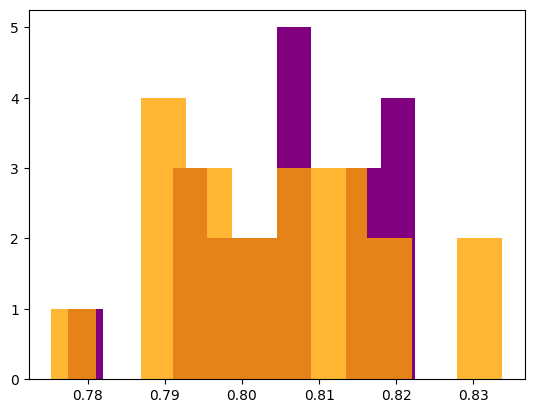

In [204]:
plt.hist(results_2, color='purple'), plt.hist(results, alpha=0.8, color='orange')
plt.show()

In [205]:
np.mean(results)

np.float64(0.8040454476747116)

In [206]:
np.mean(results_2)

np.float64(0.8052746006953193)

## Testing the model (Random Forest)

In [207]:
test['Embarked_S'] = (test['Embarked'] == 'S').astype(int)
test['Embarked_C'] = (test['Embarked'] == 'C').astype(int)
#test['Embarked_Q'] = (test['Embarked'] == 'Q').astype(int)

test['Empty_Cabin'] = test['Cabin'].isnull().astype(int)

test['Miss_women'] = test['Name'].str.contains('Miss').astype(int)
test['Mrs_women'] = test['Name'].str.contains('Mrs').astype(int)

test['Master_men'] = test['Name'].str.contains('Master').astype(int)
test['Col_men'] = test['Name'].str.contains('Col').astype(int)
test['Major_men'] = test['Name'].str.contains('Major').astype(int)
test['Mr_men'] = test['Name'].str.contains('Mr').astype(int)

In [208]:
model.fit(X,y)

p = model.predict(test[variables].fillna(-1))

## Create Submission

In [209]:
sub = pd.Series(p, index=test['PassengerId'], name='Survived')
sub.shape

(418,)

In [210]:
sub.to_csv('final_model.csv', header=True)